In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  
import os
import json

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!mkdir .kaggle
token={"username":"tusharshandilya","key":"2f5d6262ece0995e2cbbc7887115e4df"}
with open("/content/.kaggle/kaggle.json", "w") as file:
    json.dump(token, file)

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                               title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
Cornell-University/arxiv                                          arXiv Dataset                                      2GB  2020-05-06 23:18:35            305  
claytonmiller/ashrae-global-thermal-comfort-database-ii           ASHRAE Global Thermal Comfort Database II          3MB  2020-07-21 02:47:43             42  
jeffreybraun/chipotle-locations                                   Chipotle Locations                               124KB  2020-07-28 20:20:41            121  
christianlillelund/passenger-list-for-the-estonia-ferry-disaster  MS Estonia Disaster Passenger List                14KB  2020-07-26 15:40:17             51  
jeffreybraun/chopped-10-years-of-episode-data 

In [ ]:
!kaggle datasets list -s fashion

ref                                                            title                                              size  lastUpdated          downloadCount  
-------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
zalando-research/fashionmnist                                  Fashion MNIST                                      69MB  2017-12-07 00:54:20          68104  
paramaggarwal/fashion-product-images-dataset                   Fashion Product Images Dataset                     23GB  2019-03-14 18:57:43           6082  
paramaggarwal/fashion-product-images-small                     Fashion Product Images (Small)                    565MB  2019-04-26 16:33:51           4600  
datamunge/sign-language-mnist                                  Sign Language MNIST                                63MB  2017-10-20 15:09:18          27036  
nitinsss/fashion-dataset-with-over-15000-labelled-images  

In [ ]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

 97% 550M/565M [00:10<00:00, 59.7MB/s]
100% 565M/565M [00:10<00:00, 55.6MB/s]


In [ ]:
!ls


'{'   sample_data


In [ ]:
os.chdir('/content/{/content}/datasets/paramaggarwal/fashion-product-images-small')


In [ ]:
DATASET_PATH='/content/{/content}/datasets/paramaggarwal/fashion-product-images-small'

In [ ]:
!unzip fashion-product-images-small.zip

Streaming output truncated to the last 5000 lines.
  inflating: myntradataset/images/58131.jpg  
  inflating: myntradataset/images/58132.jpg  
  inflating: myntradataset/images/58133.jpg  
  inflating: myntradataset/images/58135.jpg  
  inflating: myntradataset/images/58136.jpg  
  inflating: myntradataset/images/58137.jpg  
  inflating: myntradataset/images/58138.jpg  
  inflating: myntradataset/images/58139.jpg  
  inflating: myntradataset/images/5814.jpg  
  inflating: myntradataset/images/58140.jpg  
  inflating: myntradataset/images/58141.jpg  
  inflating: myntradataset/images/58143.jpg  
  inflating: myntradataset/images/58144.jpg  
  inflating: myntradataset/images/58145.jpg  
  inflating: myntradataset/images/58146.jpg  
  inflating: myntradataset/images/58147.jpg  
  inflating: myntradataset/images/58148.jpg  
  inflating: myntradataset/images/58149.jpg  
  inflating: myntradataset/images/5815.jpg  
  inflating: myntradataset/images/58150.jpg  
  inflating: myntradataset/imag

In [ ]:
!ls

fashion-product-images-small.zip  images  myntradataset  styles.csv


In [ ]:
df = pd.read_csv("styles.csv", nrows=5000, error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016,Casual,Skagen Men Black Watch,30039.jpg


In [ ]:
print(df.shape)

(5000, 11)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow # For showing jpg files directly

In [ ]:
def show_img(img):
  cv2_imshow(load_image(img))

def img_path(img):
  return DATASET_PATH+"/images/"+img;

def load_image(img):
  img = cv2.imread((img_path(img)))
  return img

im 1417


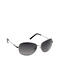

im 2839


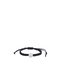

im 3890


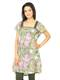

im 184


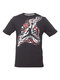

im 2613


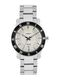

In [ ]:
for i, row in df.sample(5).iterrows():
  print("im "+str(i))
  show_img(row.image)


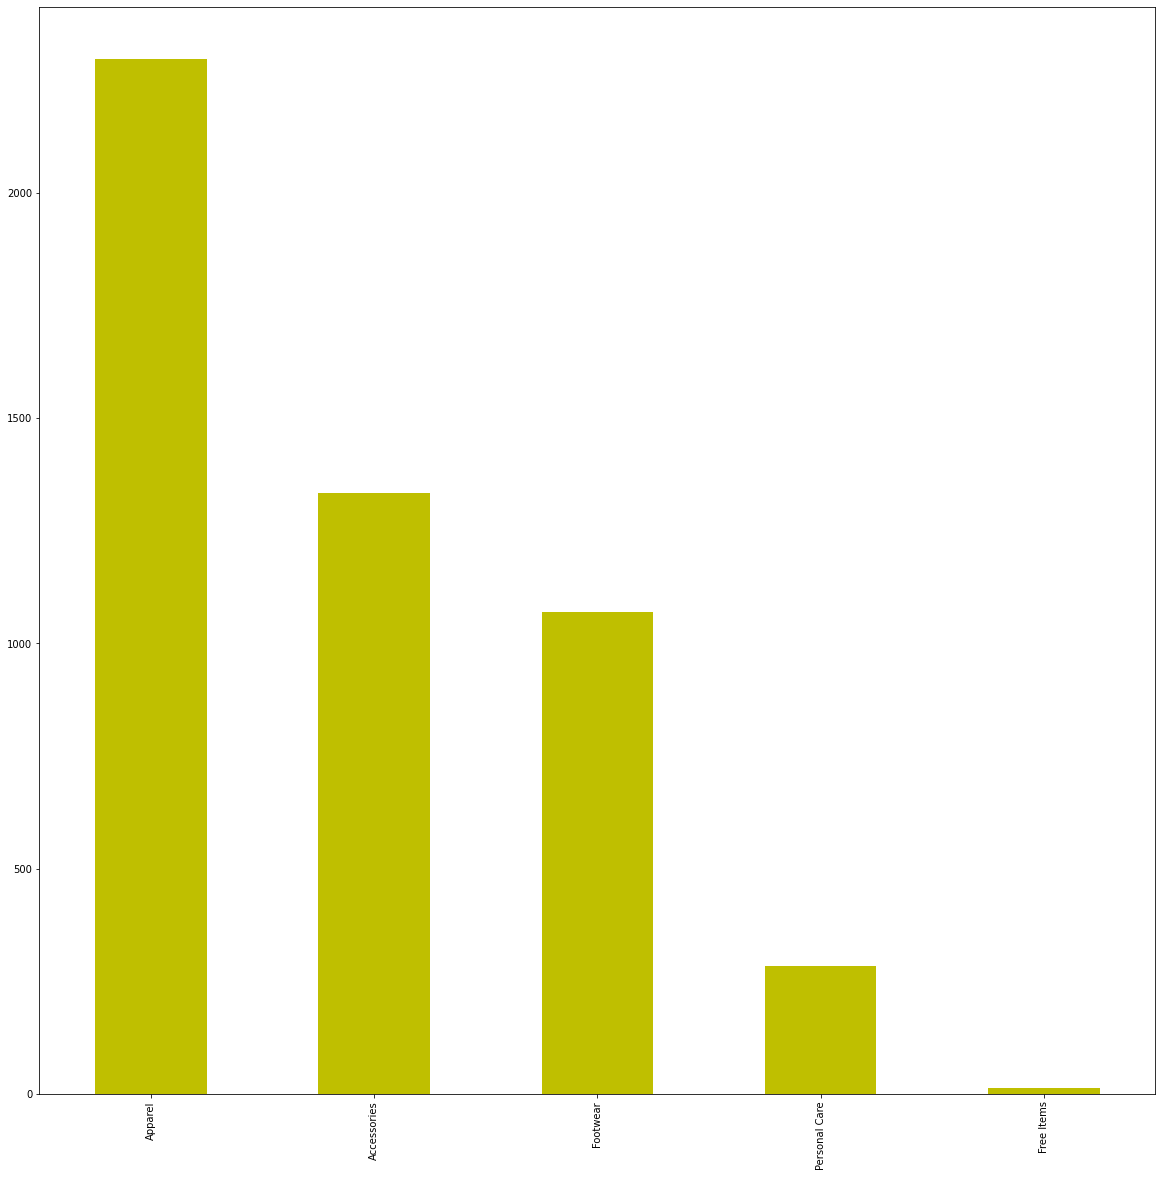

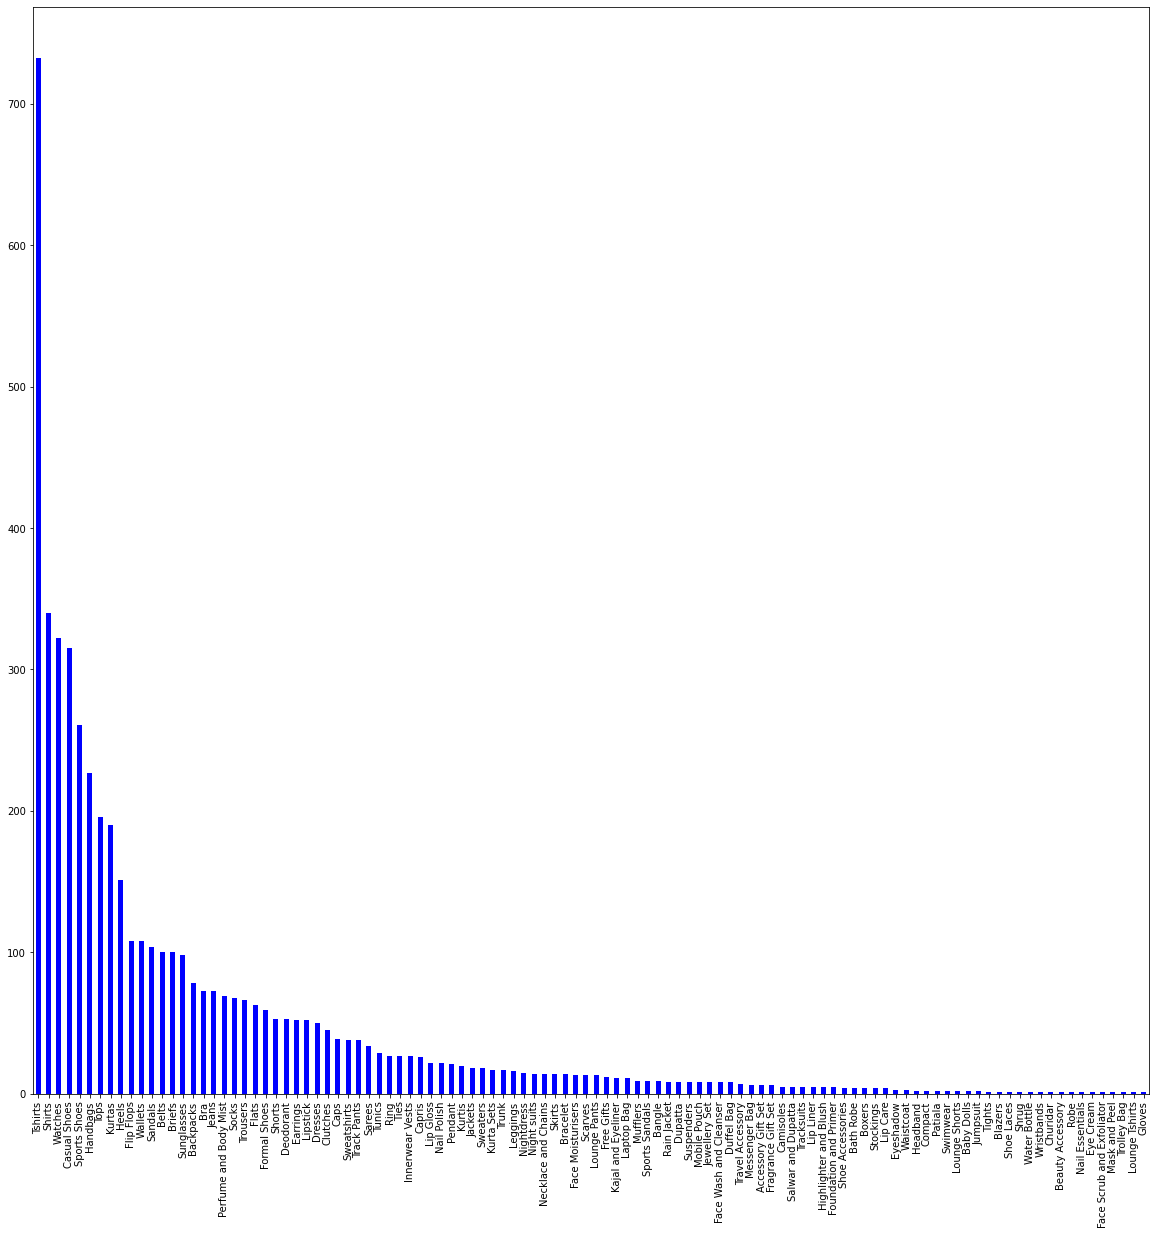

In [ ]:
plt.figure(figsize=(20,20))
df.masterCategory.value_counts().plot(kind='bar',color='y')
plt.figure(figsize=(20,20))
df.articleType.value_counts().plot(kind='bar',color='b')

In [ ]:
import tensorflow as tf
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import GlobalMaxPooling2D

In [ ]:
load_image(df['image'][0]).shape

(80, 60, 3)

In [ ]:
img_width, img_height, _ = 80, 60, 3 

base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

model = keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 3, 2, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d (Global (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
def get_embedding(model, img_name):
  img=image.load_img(img_path(img_name),target_size=(img_width,img_height))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  x= preprocess_input(x)
  return model.predict(x).reshape(-1)


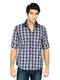

[0.        3.539251  0.        ... 4.408068  0.9500414 1.8471959]
(2048,)


In [ ]:
emb=get_embedding(model,df['image'][0]);
cv2_imshow(cv2.imread(img_path(df.iloc[0].image)))
print(emb)
print(emb.shape)


In [ ]:
df_emb=df['image'].apply(lambda img :get_embedding(model, img))
df_emb.head()

0    [0.0, 3.539251, 0.0, 1.0945961, 0.0, 0.0, 4.45...
1    [1.8793371, 1.600883, 0.09202942, 4.433076, 0....
2    [0.0, 0.31119537, 0.0, 3.8086848, 0.43703187, ...
3    [0.5880192, 9.894619, 0.0, 6.295311, 1.7837265...
4    [0.0, 1.8829765, 0.0, 5.1221013, 0.0, 0.0, 2.9...
Name: image, dtype: object

In [ ]:
df_emb=df_emb.apply(pd.Series)
df_emb.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.000000,5.772538,0.140244,0.000000,0.0,0.375528,0.606342,1.411536,8.487849,0.269106,8.935510,0.000000,4.777784,0.000000,0.000000,0.000000,0.0,0.424236,0.138195,8.938607,0.0,1.834213,0.000000,0.0,0.000000,0.000000,0.000000,0.959345,0.000000,0.000000,0.054790,9.097016,0.000000,10.146128,0.000000,1.306625,0.000000,3.322581,0.000000,0.157539,...,5.892181,0.000000,0.000000,3.537273,0.461516,0.000000,0.000000,0.0,0.0,0.180632,0.227208,0.000000,0.000000,0.853155,1.225648,0.0,1.227567,0.467132,13.934130,0.000000,6.231486,2.275496,0.456321,0.000000,0.000000,3.900507,0.000000,0.843524,0.00000,0.000000,1.195933,0.00000,0.408119,9.489583,0.932514,0.000000,6.256101,0.000000,0.000000,0.704499
1,1.045888,1.425942,0.000000,4.352488,0.0,0.000000,1.765497,2.475125,9.904766,0.000000,0.000000,1.636936,0.842475,1.638938,1.049880,0.150937,0.0,4.944593,0.000000,8.470181,0.0,10.599096,2.802056,0.0,0.000000,2.021312,0.000000,0.000000,0.000000,0.000000,1.273019,19.398922,2.508445,0.000000,0.000000,0.000000,0.000000,9.362131,0.000000,5.973500,...,1.430168,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.572579,12.966501,0.000000,2.998544,0.0,6.737069,4.639052,2.562235,4.081035,0.206808,0.939421,0.000000,0.000000,0.000000,1.954712,0.701447,0.000000,0.00000,0.000000,0.303562,0.00000,0.250192,8.294624,0.000000,0.000000,3.693617,3.521994,1.241113,2.483020
2,0.000000,2.595989,0.000000,0.000000,0.0,1.031499,0.000000,0.000000,0.374971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.243204,0.0,3.184371,0.000000,0.000000,0.0,5.126407,1.472679,0.0,0.686276,2.579617,1.153437,0.789167,0.000000,0.000000,0.000000,0.546094,0.666696,0.000000,5.012248,9.677050,2.324603,1.913821,0.000000,2.029168,...,1.229774,0.000000,1.781307,0.000000,0.500493,0.000000,0.000000,0.0,0.0,9.704094,0.000000,0.000000,5.687356,0.636473,1.869643,0.0,0.000000,1.999886,1.371650,6.509632,1.126162,0.000000,0.639462,0.710511,6.057570,0.000000,0.000000,10.525973,0.00000,1.667760,0.000000,7.48823,0.000000,0.000000,0.000000,0.000000,0.824028,0.000000,2.627375,1.107272
3,0.874987,4.082207,0.000000,7.154478,0.0,0.000000,0.000000,1.136726,9.380496,0.228719,0.000000,0.000000,0.000000,0.912685,0.000000,0.000000,0.0,0.000000,0.000000,9.396152,0.0,2.294246,3.459181,0.0,0.000000,3.832315,0.000000,4.315453,0.000000,0.552127,0.000000,17.442486,1.914322,0.584327,0.000000,0.000000,0.000000,6.010262,0.000000,1.972148,...,2.929906,0.858584,0.000000,0.000000,0.000000,0.000000,0.054271,0.0,0.0,0.000000,7.133167,2.413303,9.352273,0.090628,0.000000,0.0,2.651501,0.000000,4.015950,4.357310,1.200624,1.125477,0.000000,0.000000,0.926803,0.746796,0.000000,0.000000,0.45897,5.553913,9.714387,0.00000,0.255991,1.450679,0.000000,0.960683,0.000000,5.387162,2.000202,8.255079
4,0.000000,3.154662,0.585045,2.269981,0.0,3.617604,0.807644,3.677041,5.068245,0.000000,0.455447,0.982340,2.189922,3.819738,0.929635,0.848261,0.0,2.439691,0.725636,11.008014,0.0,7.458679,0.000000,0.0,0.000000,0.740785,0.000000,0.000000,1.120535,0.000000,1.137474,10.502215,2.327879,8.350985,0.000000,3.027702,0.000000,3.041396,0.529815,2.708280,...,3.300406,0.000000,0.000000,3.461142,3.228561,0.193165,7.823122,0.0,0.0,0.518093,2.899149,4.525680,0.000000,0.000000,0.000000,0.0,3.679595,0.044915,15.256903,3.419433,3.666455,6.137937,0.363385,0.000000,0.000000,3.151948,0.000000,3.458821,0.00000,0.000000,3.222695,0.00000,0.000000,7.601443,1.477790,0.000000,1.321286,1.542108,0.000000,0.503914


In [ ]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
cosine_sim = 1-pairwise_distances(df_emb,metric='cosine')

In [ ]:
cosine_sim[:5]

array([[0.9999994 , 0.5406321 , 0.21214277, ..., 0.44228458, 0.18820286,
        0.43287146],
       [0.5406321 , 0.99999946, 0.23728698, ..., 0.34706473, 0.18631577,
        0.5850735 ],
       [0.21214277, 0.23728698, 0.99999934, ..., 0.20677388, 0.2829969 ,
        0.25340915],
       [0.48112553, 0.7847118 , 0.22922355, ..., 0.3185615 , 0.16153014,
        0.5641717 ],
       [0.7915758 , 0.5502974 , 0.20326835, ..., 0.43790156, 0.1847279 ,
        0.44252205]], dtype=float32)

In [ ]:
cosine_sim.shape

(5000, 5000)

In [ ]:
def get_rec_images(index_chosen,num_rec=5):
  m=cosine_sim.shape[0]
  cosine_sim_chosen=cosine_sim[index_chosen]
  indexes=[x for x in range(m)]
  cosine_sim_chosen[index_chosen]=0;
  zipped=zip(cosine_sim_chosen,indexes)
  sorted_zip=sorted(zipped,reverse=True)
  indexes=[ind for _,ind in sorted_zip]
  return indexes[:num_rec]

Image chosen by you is shown below:


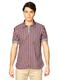

Recommended images to you:


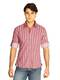

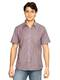

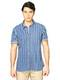

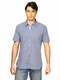

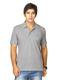

In [ ]:
##########################################################################################3
index_chosen=4000;                                                                        #change index for changing image
num_rec=5;                                                                                #no of recommended images
##########################################################################################3

print("Image chosen by you is shown below:")
show_img(df['image'][index_chosen])
indexes=get_rec_images(index_chosen,num_rec)
print("Recommended images to you:")
for i in range(num_rec):
  show_img(df['image'][indexes[i]])

In [ ]:
from sklearn.manifold import TSNE
import time
import seaborn as sns

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_emb)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 123.60460615158081 seconds


In [ ]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

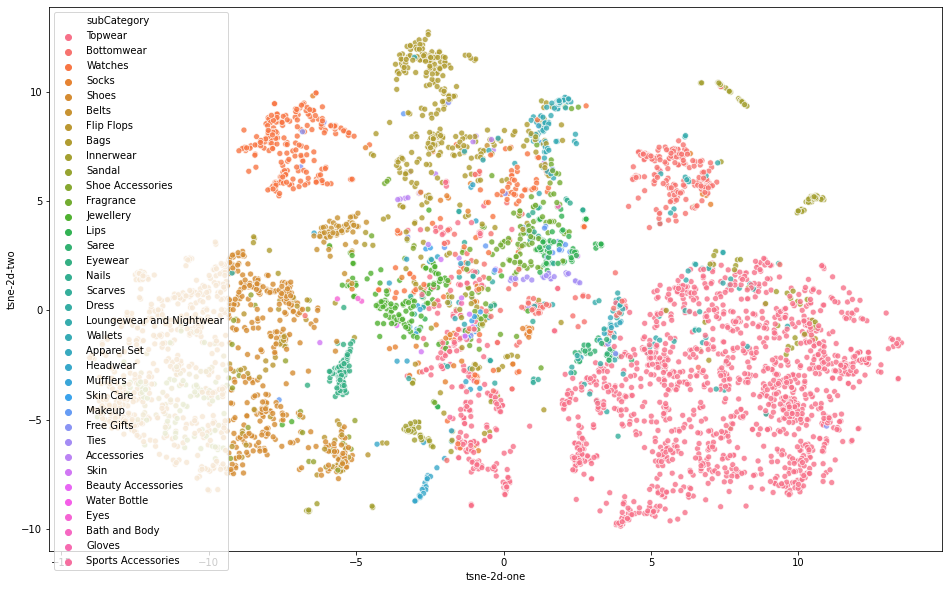

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="subCategory",
                data=df,
                legend="full",
                alpha=0.8)
